In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv("/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv")
print(df.shape)

(267, 9)


In [3]:
df.head(10)

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   
5  Andhra Pradesh   30-06-2020          M                              3.31   
6  Andhra Pradesh   31-07-2020          M                              8.34   
7  Andhra Pradesh   31-08-2020          M                              6.96   
8  Andhra Pradesh   30-09-2020          M                              6.40   
9  Andhra Pradesh   31-10-2020          M                              6.59   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   
5             19805400                                     47.41    South   
6             15431615                                     38.91    South   
7             15251776                                     37.83    South   
8             15220312                                     37.47    South   
9             15157557                                     37.34    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74  
5    15.9129     79.74  
6    15.9129     79.74  
7    15.9129     79.74  
8    15.9129     79.74  
9    15.9129     79.74

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [6]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [7]:
df.describe()

Estimated Unemployment Rate (%)   Estimated Employed  \
count                        267.000000         2.670000e+02   
mean                          12.236929         1.396211e+07   
std                           10.803283         1.336632e+07   
min                            0.500000         1.175420e+05   
25%                            4.845000         2.838930e+06   
50%                            9.650000         9.732417e+06   
75%                           16.755000         2.187869e+07   
max                           75.850000         5.943376e+07   

        Estimated Labour Participation Rate (%)   longitude    latitude  
count                                267.000000  267.000000  267.000000  
mean                                  41.681573   22.826048   80.532425  
std                                    7.845419    6.270731    5.831738  
min                                   16.770000   10.850500   71.192400  
25%                                   37.265000   18.112400   76.085600  
50%                                   40.390000   23.610200   79.019300  
75%                                   44.055000   27.278400   85.279900  
max                                   69.690000   33.778200   92.937600

In [8]:
df.Region.value_counts()

Region
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

In [9]:
df.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region","longitude","latitude"]

In [10]:
df.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude'],
      dtype='object')

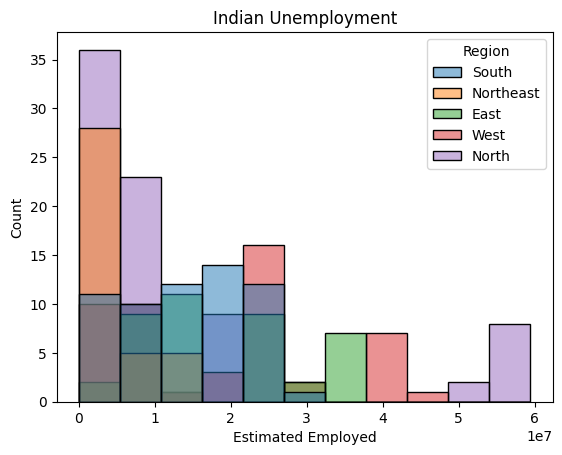

In [11]:
df.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region",
               "longitude","latitude"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=df)
plt.show()

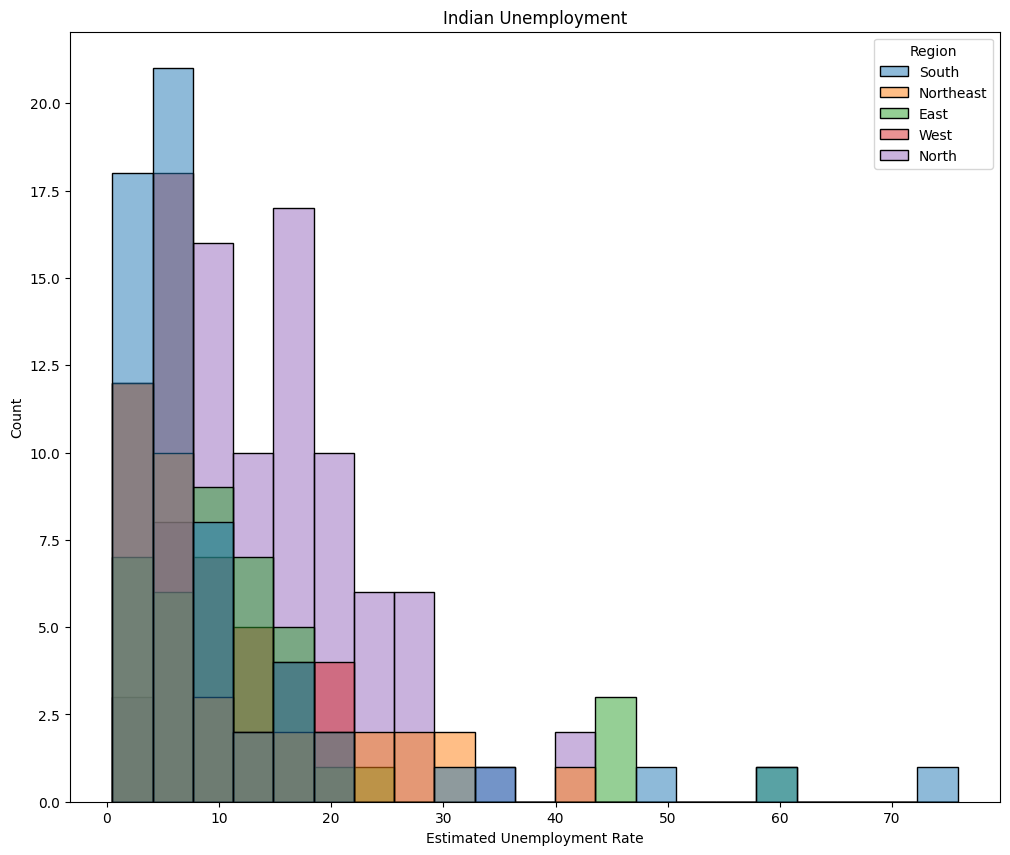

In [12]:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=df)
plt.show()

In [23]:
unemployment = df[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemployment, path=["Region", "States"], 
                     values="Estimated Unemployment Rate", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India")
figure.show()

In [16]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   States                               267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    object        
 3   Estimated Unemployment Rate          267 non-null    float64       
 4   Estimated Employed                   267 non-null    int64         
 5   Estimated Labour Participation Rate  267 non-null    float64       
 6   Region                               267 non-null    object        
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 18.9+ KB


In [17]:
df['month_int']=df['Date'].dt.month
df

States       Date Frequency  Estimated Unemployment Rate  \
0    Andhra Pradesh 2020-01-31         M                         5.48   
1    Andhra Pradesh 2020-02-29         M                         5.83   
2    Andhra Pradesh 2020-03-31         M                         5.79   
3    Andhra Pradesh 2020-04-30         M                        20.51   
4    Andhra Pradesh 2020-05-31         M                        17.43   
..              ...        ...       ...                          ...   
262     West Bengal 2020-06-30         M                         7.29   
263     West Bengal 2020-07-31         M                         6.83   
264     West Bengal 2020-08-31         M                        14.87   
265     West Bengal 2020-09-30         M                         9.35   
266     West Bengal 2020-10-31         M                         9.98   

     Estimated Employed  Estimated Labour Participation Rate Region  \
0              16635535                                41.02  South   
1              16545652                                40.90  South   
2              15881197                                39.18  South   
3              11336911                                33.10  South   
4              12988845                                36.46  South   
..                  ...                                  ...    ...   
262            30726310                                40.39   East   
263            35372506                                46.17   East   
264            33298644                                47.48   East   
265            35707239                                47.73   East   
266            33962549                                45.63   East   

     longitude  latitude  month_int  
0      15.9129    79.740          1  
1      15.9129    79.740          2  
2      15.9129    79.740          3  
3      15.9129    79.740          4  
4      15.9129    79.740          5  
..         ...       ...        ...  
262    22.9868    87.855          6  
263    22.9868    87.855          7  
264    22.9868    87.855          8  
265    22.9868    87.855          9  
266    22.9868    87.855         10  

[267 rows x 10 columns]

In [18]:
df['month']=df['month_int'].apply(lambda x: calendar.month_abbr[x])
df

States       Date Frequency  Estimated Unemployment Rate  \
0    Andhra Pradesh 2020-01-31         M                         5.48   
1    Andhra Pradesh 2020-02-29         M                         5.83   
2    Andhra Pradesh 2020-03-31         M                         5.79   
3    Andhra Pradesh 2020-04-30         M                        20.51   
4    Andhra Pradesh 2020-05-31         M                        17.43   
..              ...        ...       ...                          ...   
262     West Bengal 2020-06-30         M                         7.29   
263     West Bengal 2020-07-31         M                         6.83   
264     West Bengal 2020-08-31         M                        14.87   
265     West Bengal 2020-09-30         M                         9.35   
266     West Bengal 2020-10-31         M                         9.98   

     Estimated Employed  Estimated Labour Participation Rate Region  \
0              16635535                                41.02  South   
1              16545652                                40.90  South   
2              15881197                                39.18  South   
3              11336911                                33.10  South   
4              12988845                                36.46  South   
..                  ...                                  ...    ...   
262            30726310                                40.39   East   
263            35372506                                46.17   East   
264            33298644                                47.48   East   
265            35707239                                47.73   East   
266            33962549                                45.63   East   

     longitude  latitude  month_int month  
0      15.9129    79.740          1   Jan  
1      15.9129    79.740          2   Feb  
2      15.9129    79.740          3   Mar  
3      15.9129    79.740          4   Apr  
4      15.9129    79.740          5   May  
..         ...       ...        ...   ...  
262    22.9868    87.855          6   Jun  
263    22.9868    87.855          7   Jul  
264    22.9868    87.855          8   Aug  
265    22.9868    87.855          9   Sep  
266    22.9868    87.855         10   Oct  

[267 rows x 11 columns]

In [19]:
data=df.groupby(['month'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean()
data=pd.DataFrame(data).reset_index()

In [20]:
month=data.month
unemployment_rate=data['Estimated Unemployment Rate']
labour_participation_rate=data['Estimated Labour Participation Rate']

fig=go.Figure()

fig.add_trace(go.Bar(x=month,y=unemployment_rate,name='Unemployment Rate'))
fig.add_trace(go.Bar(x=month,y=labour_participation_rate,name='Labour Participation Rate'))

fig.update_layout(title='Unemployment Rate and Labour Participation Rate',xaxis={'categoryorder':'array','categoryarray':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']})
fig.show()

In [26]:
fig=px.box(data_frame=df,x='States',y='Estimated Unemployment Rate',color='States',title='Unemployment rate')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [29]:
fig = px.bar(df,x='States',y='Estimated Unemployment Rate',animation_frame='month',color='States',
            title='Unemployment rate from Jan 2020 to Oct 2020(StateWise)')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [31]:
fig=px.scatter_geo(df,'longitude','latitude',color='States',
                  hover_name='States',size='Estimated Unemployment Rate',
                  animation_frame='month',scope='asia',title='Impact of lockdown on employment in India')

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] =2000
fig.update_geos(lataxis_range=[5,40],lonaxis_range=[65,100],oceancolor='lightblue',
               showocean=True)

fig.show()

In [33]:
before_lockdown = df[(df['month_int']>=1) &(df['month_int'] <4)]
after_lockdown = df[(df['month_int'] >=4) & (df['month_int'] <=6)]
af_lockdown = after_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

lockdown = before_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
lockdown['Unemployment Rate before Lockdown'] = af_lockdown['Estimated Unemployment Rate']

lockdown.columns = ['States','Unemployment Rate before Lockdown','Unemployment Rate after Lockdown']
lockdown.head()

States  Unemployment Rate before Lockdown  \
0  Andhra Pradesh                           5.700000   
1           Assam                           4.613333   
2           Bihar                          12.110000   
3    Chhattisgarh                           8.523333   
4           Delhi                          18.036667   

   Unemployment Rate after Lockdown  
0                         13.750000  
1                          7.070000  
2                         36.806667  
3                          9.380000  
4                         25.713333

In [35]:
lockdown['rate change in unemployment'] =round(lockdown['Unemployment Rate before Lockdown']-lockdown['Unemployment Rate before Lockdown']
                                              /lockdown['Unemployment Rate after Lockdown'],2)
fig = px.bar(lockdown,x='States',y='rate change in unemployment',color='rate change in unemployment',
            title='Percentage change in Unemployment rate in each state after lockdown',template='ggplot2')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()